# PREDICTING "COMPANY STOCK AND INVESTMENT DATASET USING" FACEBOOK PROPHET 
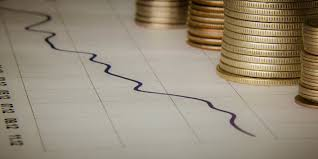



# STEP #0: PROBLEM STATEMENT

Time Series Project Explanation
This problem statement has 3 target column and 1-time axis
It is 3 project combined as one.
The company wants to know what the should be investing as after covid crashes it has become even harder to judge in what to invest.
As investing is a risky part we need to make 3 models to help the company.
Mind these things while working on it.

1. Time Series only have a time axis and a target axis.
2. We have to make 3 projects in which time is the common axis and target values are changing.
3. Stock detail you have is 2009 - 2017, prediction required Predict 2018 to 2021.
Note: We are in the year of 2020 end that means the company will test model from 2018 -2020 and if the results are accurate and match there existing data a prediction of 2021 will be made from your model. Which will have a high probability of being accurate.
4. As you have no way of finding out how it performed at production use split of train test validate.
5. Make 3 split of data one for train,one for test and final for validation.eg( 2009-2017 =8 year, 6yr - train,2- validate,-2 for test(last 2 year).
6. As we know past 3 to 4-year data is not a good choice, once you are done with all above a 4th model can be made with last 3-years and test with last year data 2017. This part is completely optional.



# STEP #1: IMPORTING DATA

- You must install fbprophet package as follows: 
     pip install fbprophet
     
- If you encounter an error, try: 
    conda install -c conda-forge fbprophet

- Prophet is open source software released by Facebook’s Core Data Science team.

- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

- Prophet works best with time series that have strong seasonal effects and several seasons of historical data. 

- For more information, please check this out: https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api


In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
!pip install fbprophet
from fbprophet import Prophet


In [2]:
# dataframes creation for both training and testing datasets 
stock_df = pd.read_csv('Company Stock and Investment.csv')


# STEP #2: EXPLORING THE DATASET  

In [3]:
# Let's view the head of the training dataset
stock_df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
# Let's view the last elements in the training dataset
stock_df.tail(10)

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
1974,02-11-2017,0.004234,0.001684,0.007310,-0.008571
1975,03-11-2017,0.019798,-0.009381,0.026114,0.015883
1976,06-11-2017,0.030739,0.002920,0.010145,0.008150
1977,07-11-2017,-0.002616,0.003698,0.003214,0.002240
1978,08-11-2017,-0.006470,0.006585,0.008180,0.008645
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793
1983,15-11-2017,-0.007006,0.005963,-0.013190,-0.008928


In [6]:
stock_df = stock_df.sort_values("Date")

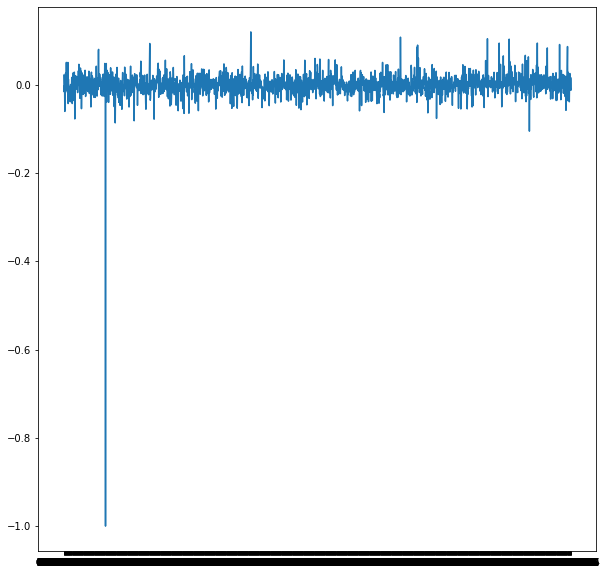

In [9]:
plt.figure(figsize=(10,10))
plt.plot(stock_df['Date'], stock_df['Oil Investments'])


In [10]:
stock_df

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
20,01-02-2010,0.021414,0.007418,0.013902,-0.052149
273,01-02-2011,-0.015936,0.003391,0.016828,0.014560
525,01-02-2012,-0.008430,-0.002294,-0.000635,-0.077042
776,01-02-2013,-0.001946,0.002553,-0.004105,-0.001883
1530,01-02-2016,-0.060606,0.013222,-0.009349,-0.020767
...,...,...,...,...,...
252,31-12-2010,0.017028,-1.000000,-0.003399,-0.015048
754,31-12-2012,0.012905,-1.000000,0.044310,0.023207
1006,31-12-2013,-0.007381,-1.000000,0.011722,0.013778
1258,31-12-2014,-0.012745,-1.000000,-0.019019,0.000161


(array([   0,    1,    2, ..., 1871, 1872, 1873]),
 <a list of 1874 Text major ticklabel objects>)

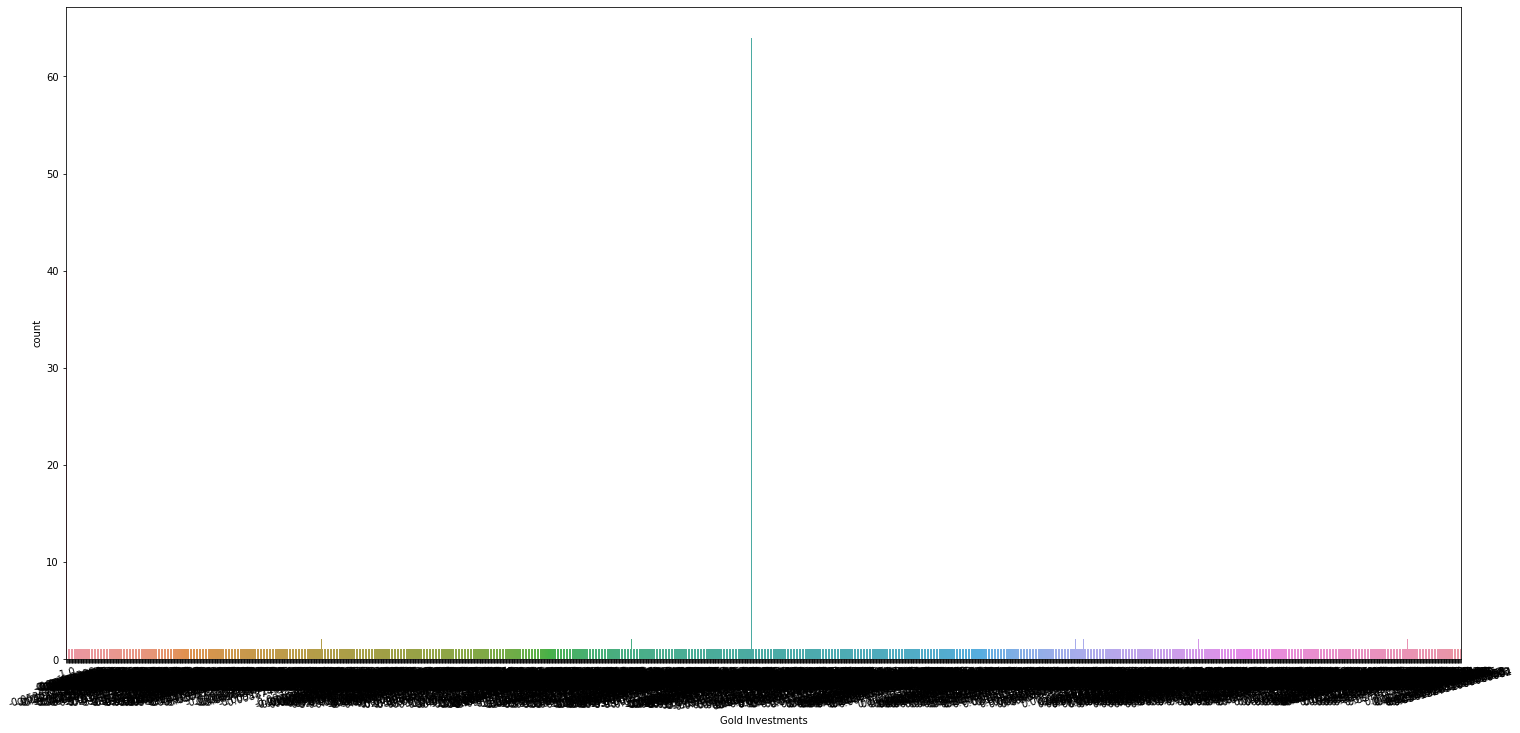

In [12]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[25,12])
sns.countplot(x = 'Gold Investments', data = stock_df)
plt.xticks(rotation = 15)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

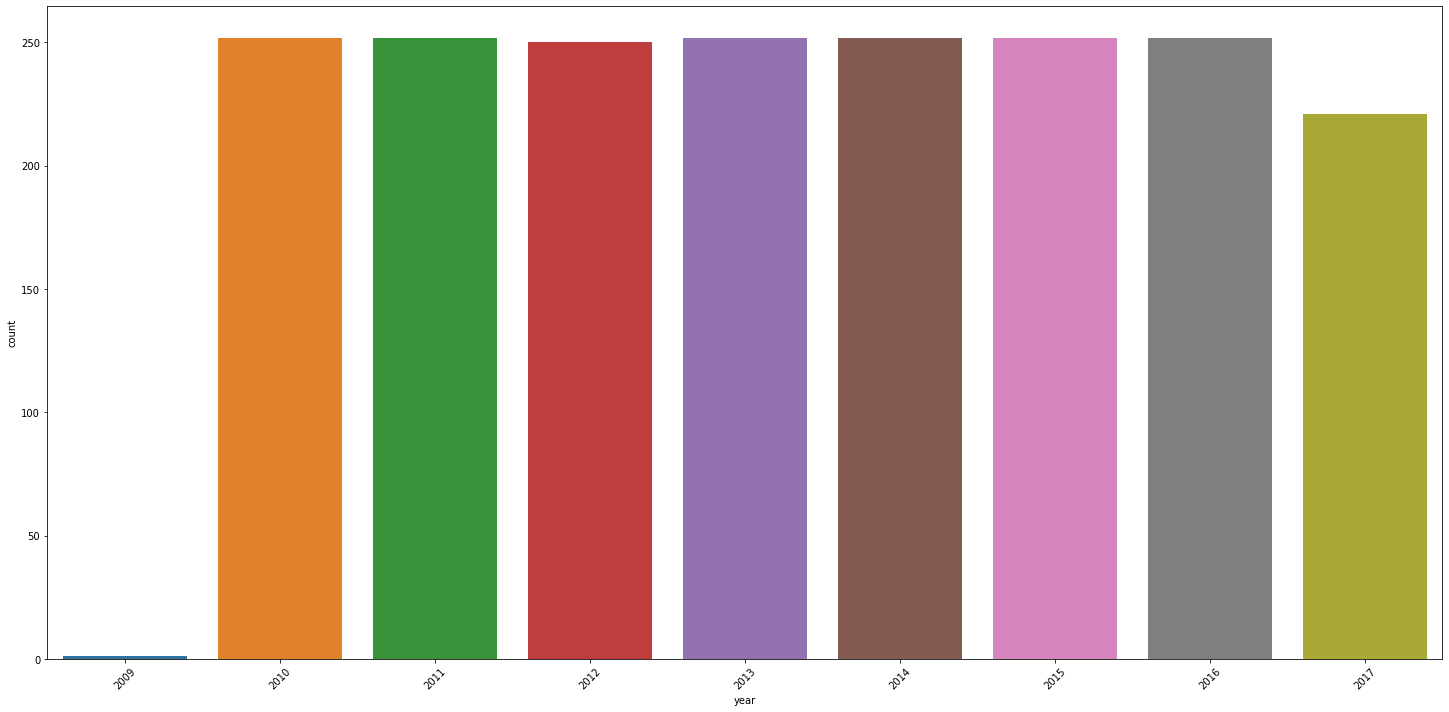

In [16]:
# Bar Chart to indicate the year

stock_df['year'] = pd.DatetimeIndex(stock_df['Date']).year
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = stock_df)
plt.xticks(rotation = 45)


In [23]:
stock_prophet_df = stock_df[['Date', 'Gold Investments']] 


In [24]:
stock_prophet_df

,Date,Gold Investments
20,01-02-2010,0.007418
273,01-02-2011,0.003391
525,01-02-2012,-0.002294
776,01-02-2013,0.002553
1530,01-02-2016,0.013222
...,...,...
252,31-12-2010,-1.000000
754,31-12-2012,-1.000000
1006,31-12-2013,-1.000000
1258,31-12-2014,-1.000000


# STEP 3: MAKE PREDICTIONS

In [25]:
stock_prophet_df = stock_prophet_df.rename(columns={'Date':'ds', 'Gold Investments':'y'})


In [26]:
stock_prophet_df

,ds,y
20,01-02-2010,0.007418
273,01-02-2011,0.003391
525,01-02-2012,-0.002294
776,01-02-2013,0.002553
1530,01-02-2016,0.013222
...,...,...
252,31-12-2010,-1.000000
754,31-12-2012,-1.000000
1006,31-12-2013,-1.000000
1258,31-12-2014,-1.000000


In [27]:
m = Prophet()
m.fit(stock_prophet_df)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [29]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-12-31,-0.015961,-0.321681,0.013290,-0.015961,-0.015961,-0.143552,-0.143552,-0.143552,0.002717,0.002717,0.002717,-0.146269,-0.146269,-0.146269,0.0,0.0,0.0,-0.159513
1,2010-01-02,-0.015963,-0.310480,0.036351,-0.015963,-0.015963,-0.112106,-0.112106,-0.112106,0.018987,0.018987,0.018987,-0.131093,-0.131093,-0.131093,0.0,0.0,0.0,-0.128069
2,2010-01-03,-0.015964,-0.302336,0.030377,-0.015964,-0.015964,-0.111721,-0.111721,-0.111721,0.009850,0.009850,0.009850,-0.121571,-0.121571,-0.121571,0.0,0.0,0.0,-0.127686
3,2010-01-04,-0.015965,-0.322718,0.011583,-0.015965,-0.015965,-0.140366,-0.140366,-0.140366,-0.029375,-0.029375,-0.029375,-0.110991,-0.110991,-0.110991,0.0,0.0,0.0,-0.156332
4,2010-01-06,-0.015968,-0.282758,0.075055,-0.015968,-0.015968,-0.081070,-0.081070,-0.081070,0.006374,0.006374,0.006374,-0.087444,-0.087444,-0.087444,0.0,0.0,0.0,-0.097038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344,2018-12-06,-0.019992,-0.145131,0.206029,-0.019997,-0.019988,0.051149,0.051149,0.051149,0.002717,0.002717,0.002717,0.048432,0.048432,0.048432,0.0,0.0,0.0,0.031157
2345,2018-12-07,-0.019993,-0.150413,0.188451,-0.019998,-0.019989,0.031410,0.031410,0.031410,-0.011028,-0.011028,-0.011028,0.042437,0.042437,0.042437,0.0,0.0,0.0,0.011416
2346,2018-12-08,-0.019995,-0.142254,0.200798,-0.019999,-0.019990,0.054083,0.054083,0.054083,0.018987,0.018987,0.018987,0.035096,0.035096,0.035096,0.0,0.0,0.0,0.034089
2347,2018-12-09,-0.019996,-0.167179,0.190546,-0.020001,-0.019991,0.036321,0.036321,0.036321,0.009850,0.009850,0.009850,0.026471,0.026471,0.026471,0.0,0.0,0.0,0.016325


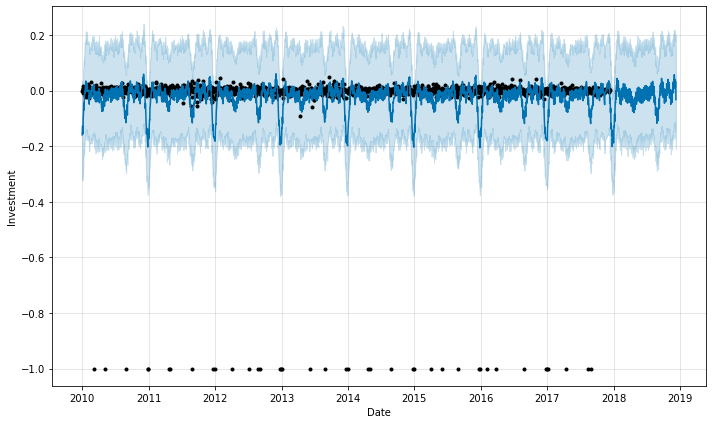

In [30]:
figure = m.plot(forecast, xlabel='Date', ylabel='Investment')

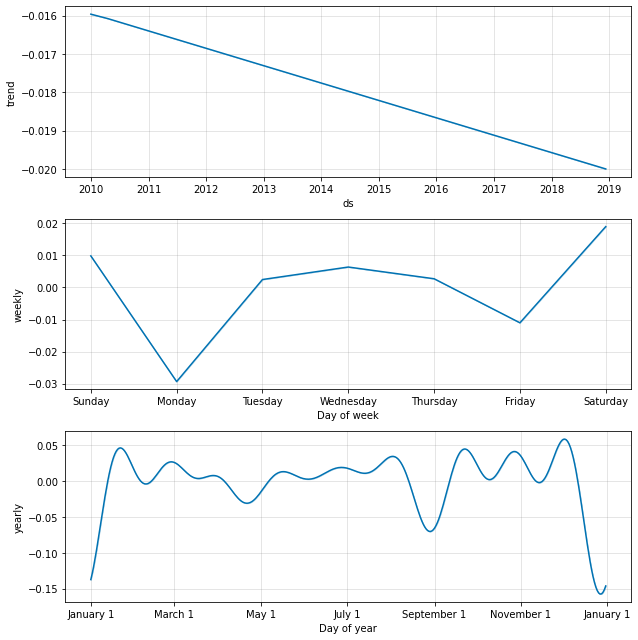

In [31]:
figure3 = m.plot_components(forecast)

# GREAT JOB, KEEP UP THE GREAT WORK!